In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
L = 1
xmin = 0
xmax = 1

x = np.linspace(xmin, xmax, 1000)

In [7]:
def initial():
    # return  (50)*(1.7*(x/L)**2 - 0.7*(x/L) − (x/L)**3) * ln(1 + x/L)
    return 50 * (1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3) * np.log(1 + x/L)

def en(n):
    return np.sqrt(2/L) * np.sin(n*np.pi*x/L)

dot = lambda y,n: np.sqrt(2/L) * np.sin(n*np.pi*x/L) * 50 *\
    (1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3) * np.log(1 + x/L)

def y(n, An, t=0):
    total = 0
    for i in range(n):
        total += An[i] * en(i)
    return total

In [8]:
from scipy import integrate

In [16]:
ans = []
for n in range(1, 16):
    an = integrate.quad(
            lambda x: np.sqrt(2/L) * np.sin(n*np.pi*x/L) * 50 *\
            (1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3) * np.log(1 + x/L),
          0, 1)
    ans.append(an[0])

In [18]:
ans = []
for n in range(1, 16):
    an = integrate.quad(lambda x: (np.sqrt(2/L) * np.sin(n*np.pi*x/L))**2,
          0, 1)
    ans.append(an[0])

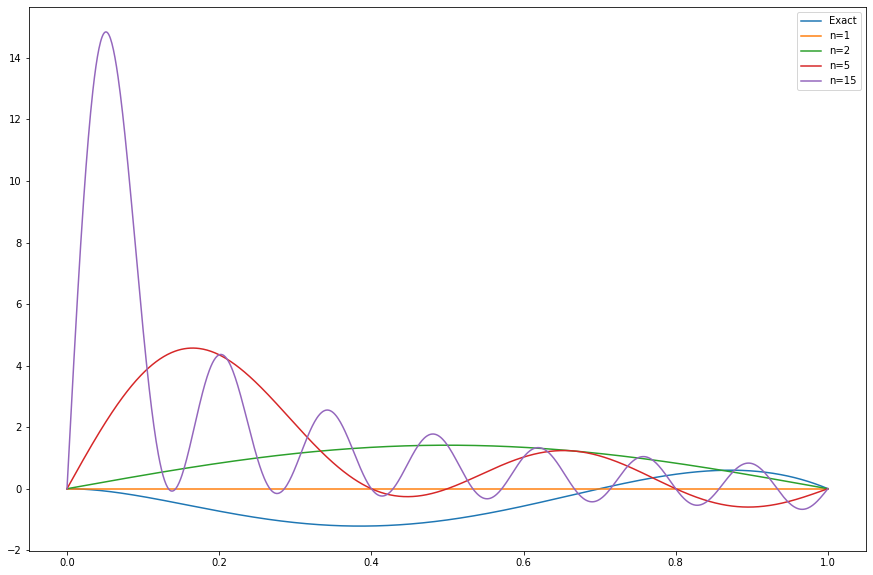

In [19]:
plt.figure(figsize=(15,10))
plt.plot(x, initial(), label="Exact")
for n in [1,2,5,15]:
    plt.plot(x, y(n, ans), label=f"n={n}")
plt.legend()
plt.show()